<a href="https://colab.research.google.com/github/carlosrome/ML-Research-Project-Physics/blob/main/IntensityValues_CircularSensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless

from google.colab import drive
drive.mount('/content/gdrive')


import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


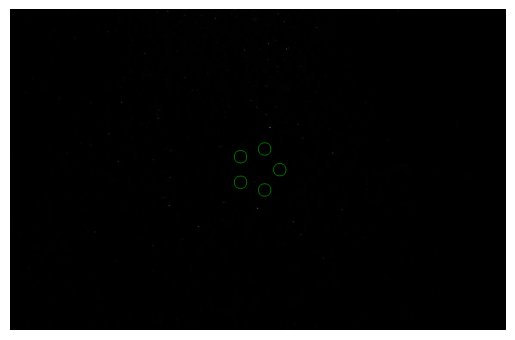

Frame 0


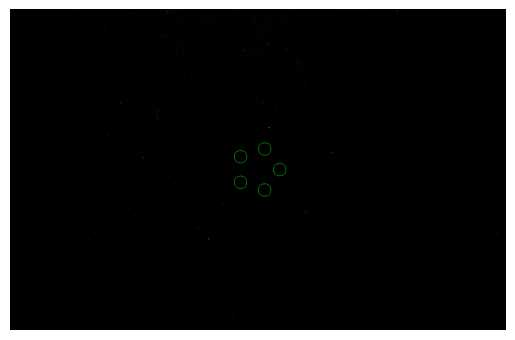

Frame 1


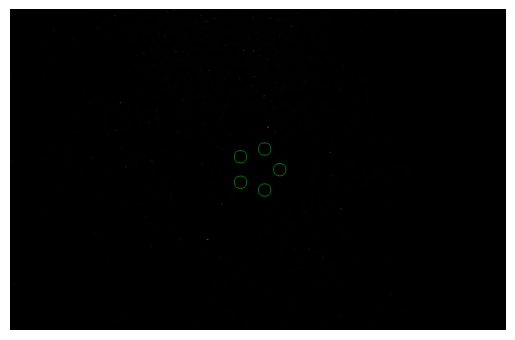

Frame 2


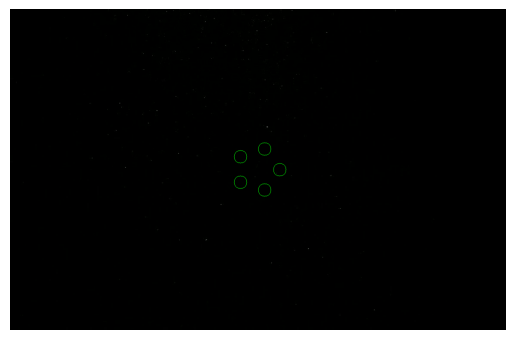

Frame 3


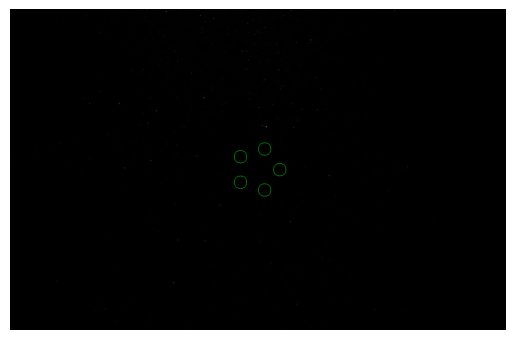

Frame 4


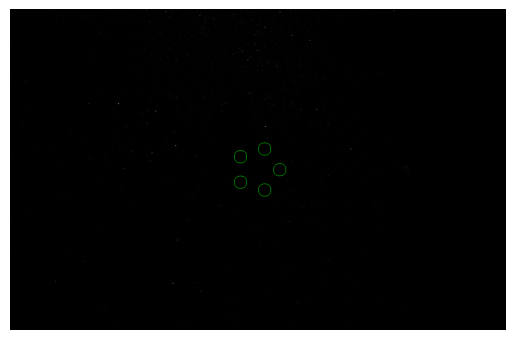

Frame 5


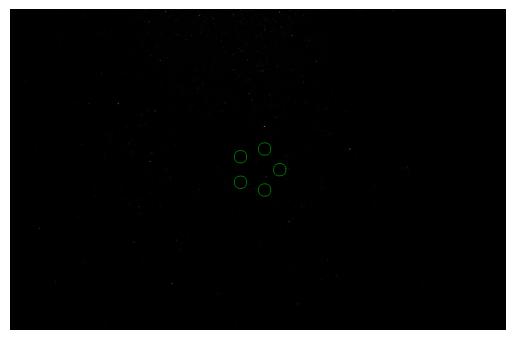

Frame 6


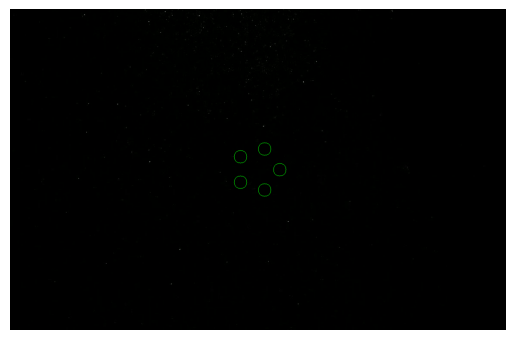

Frame 7


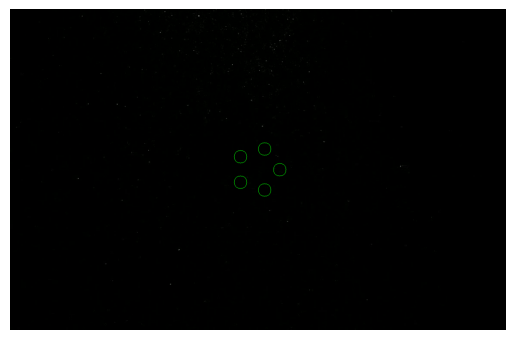

Frame 8


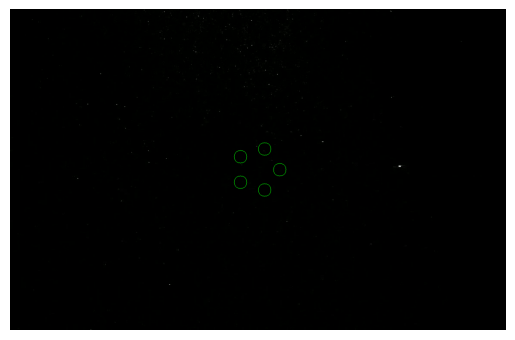

Frame 9


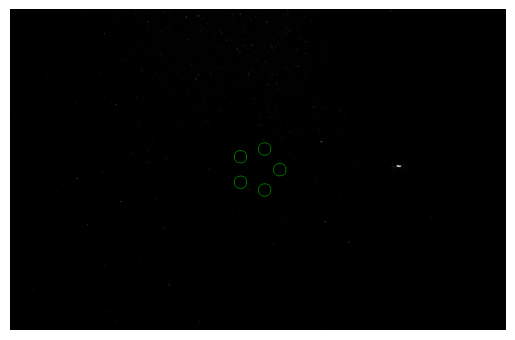

Frame 10


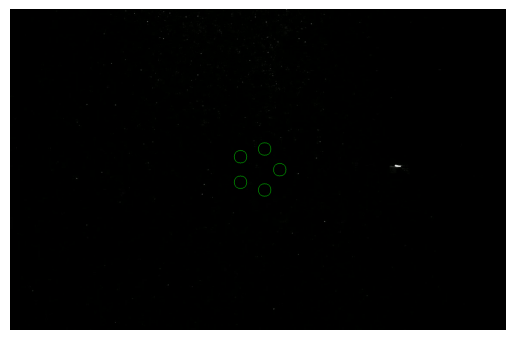

Frame 11


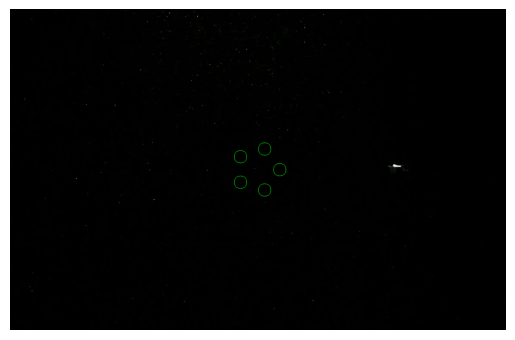

Frame 12


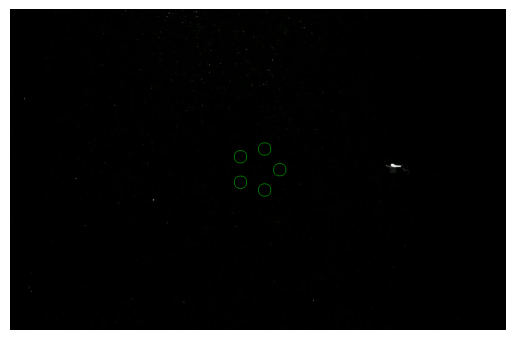

Frame 13


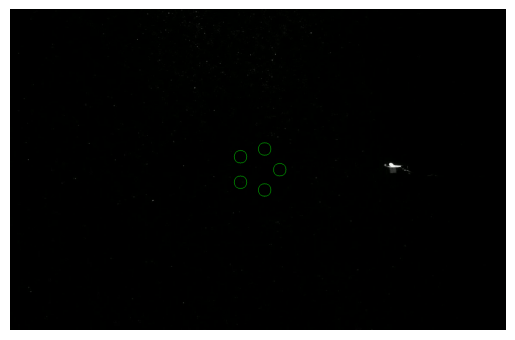

Frame 14


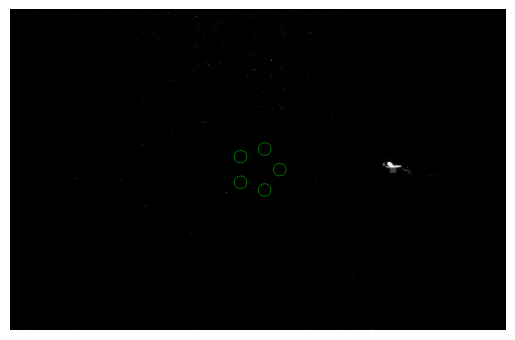

Frame 15


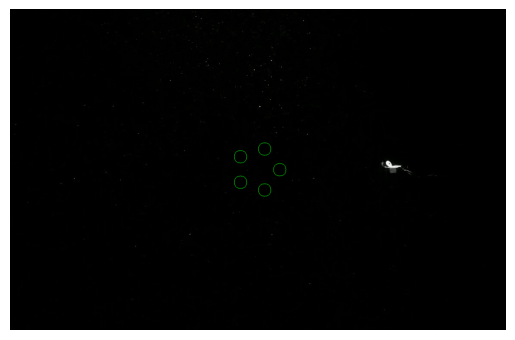

Frame 16


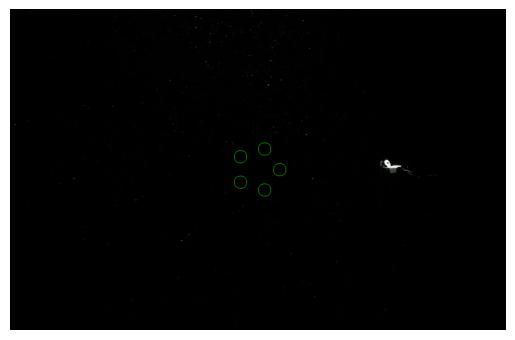

Frame 17


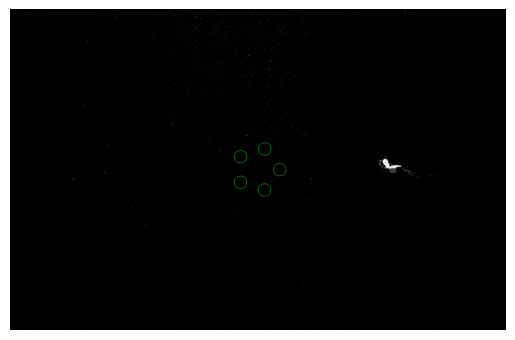

Frame 18


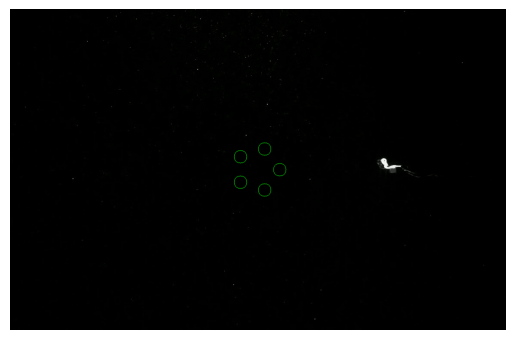

Frame 19


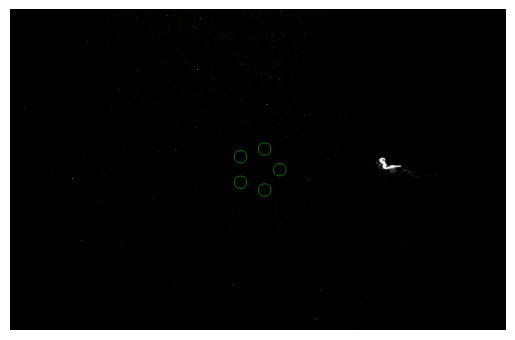

Frame 20


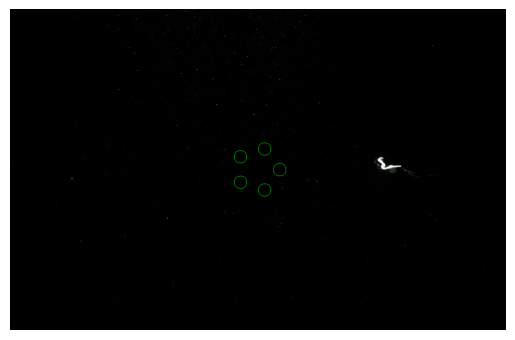

Frame 21


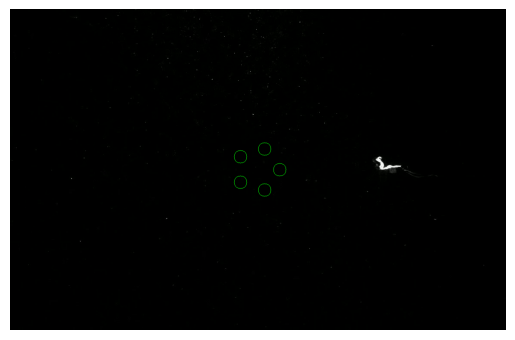

Frame 22


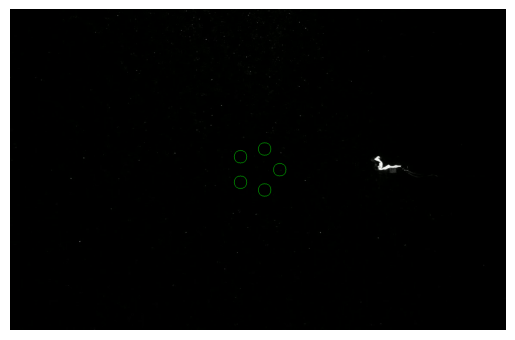

Frame 23


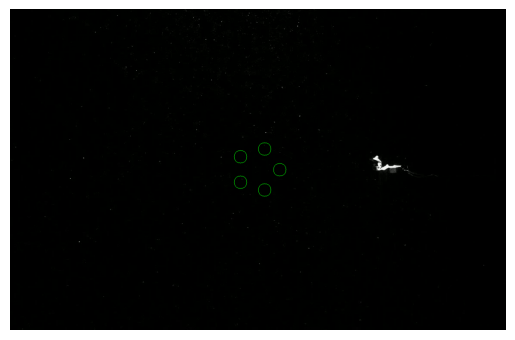

Frame 24


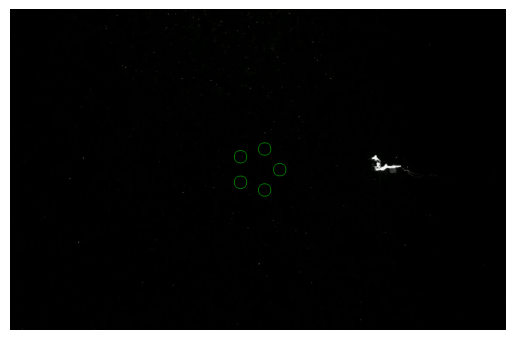

Frame 25


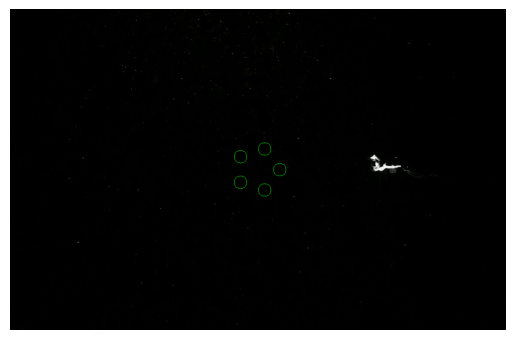

Frame 26


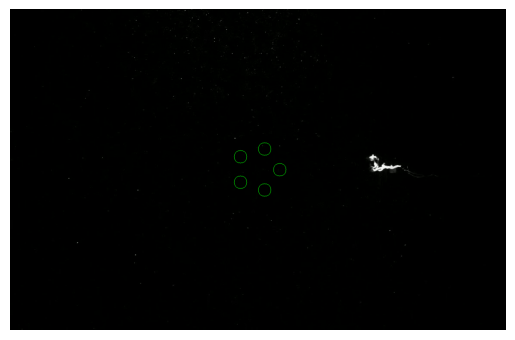

Frame 27


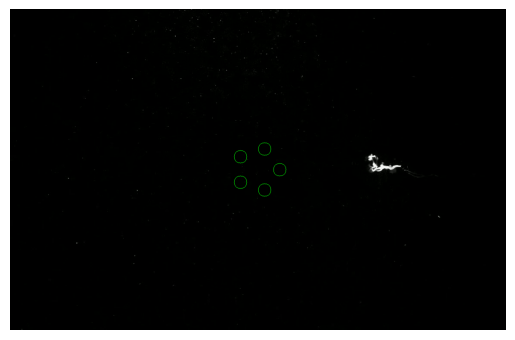

Frame 28


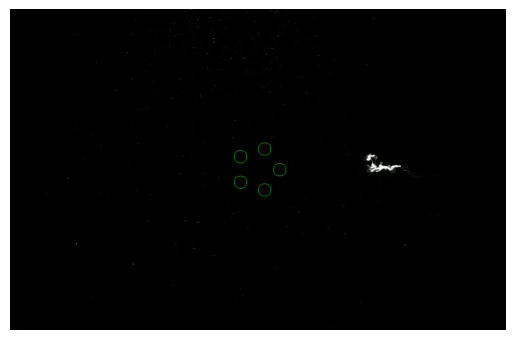

Frame 29


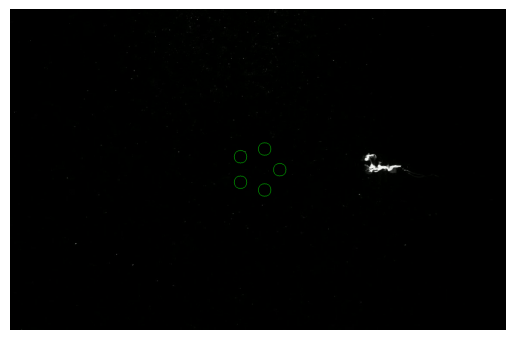

Frame 30


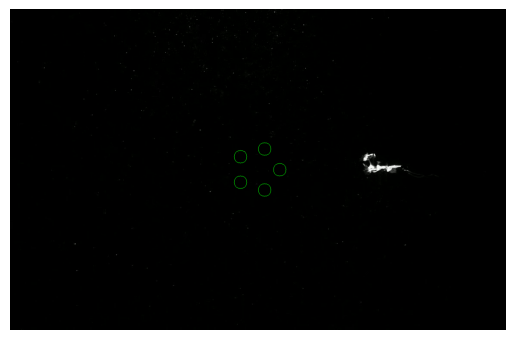

Frame 31


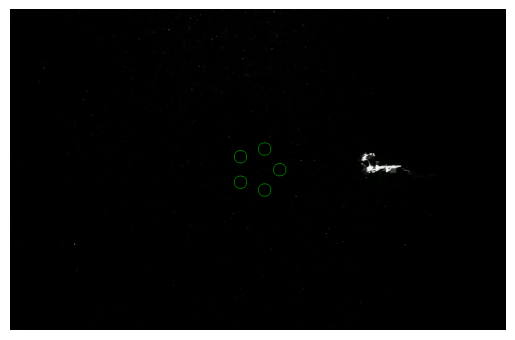

Frame 32


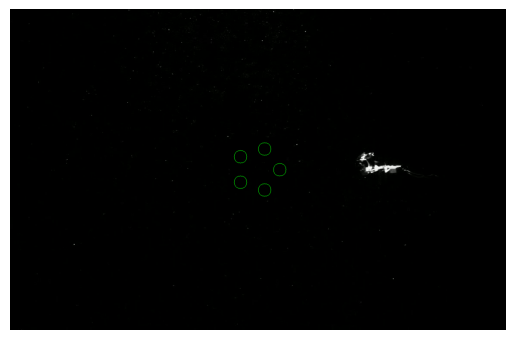

Frame 33


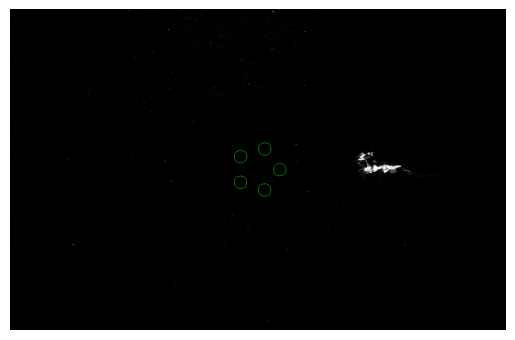

Frame 34


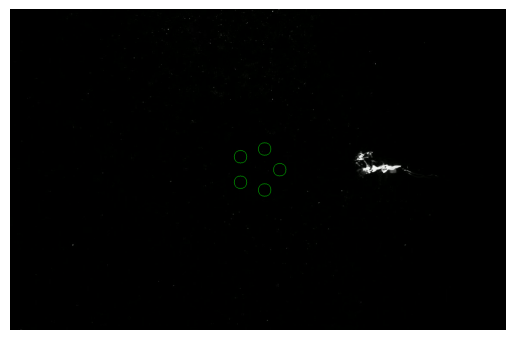

Frame 35


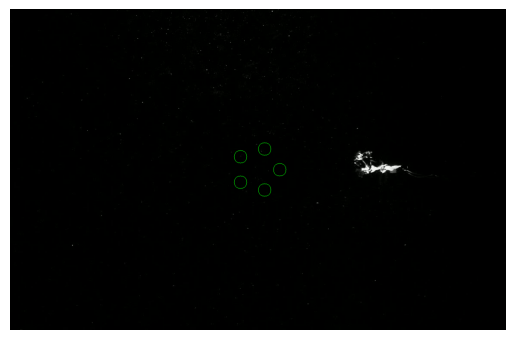

Frame 36


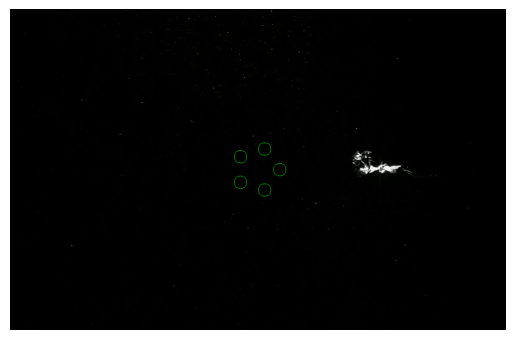

Frame 37


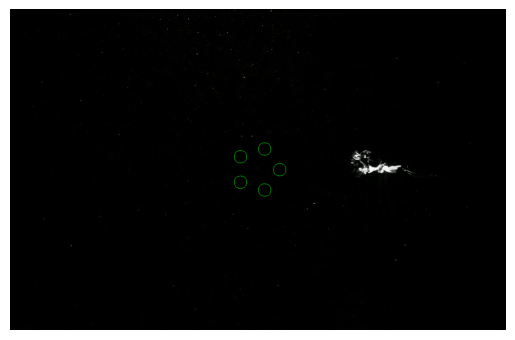

Frame 38


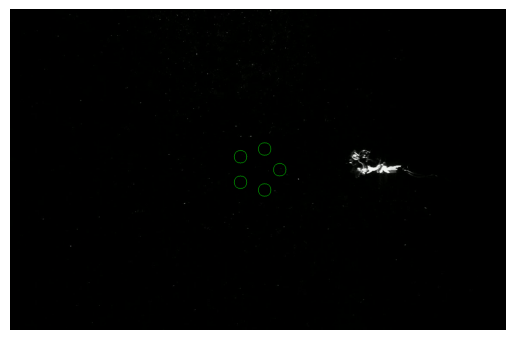

Frame 39


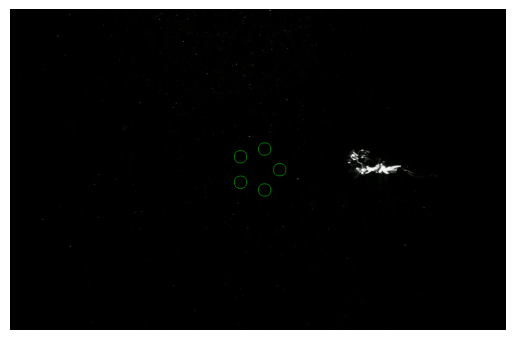

Frame 40


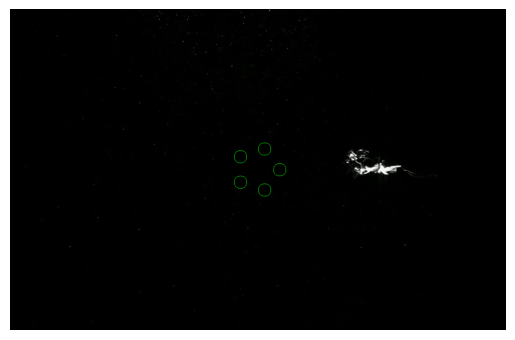

Frame 41


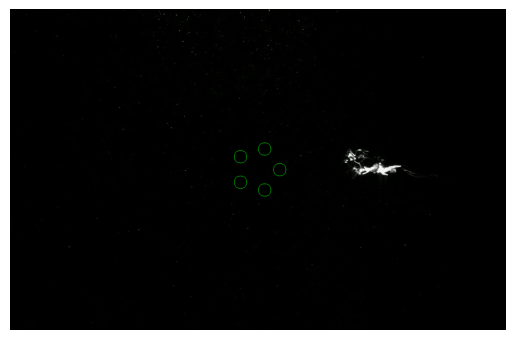

Frame 42


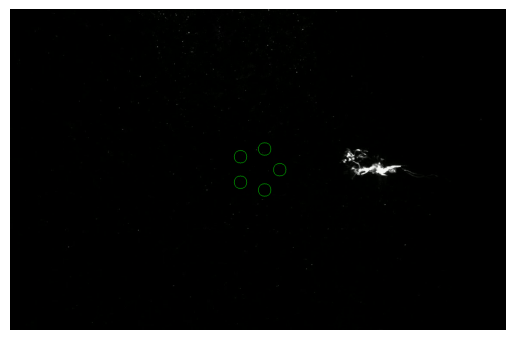

Frame 43


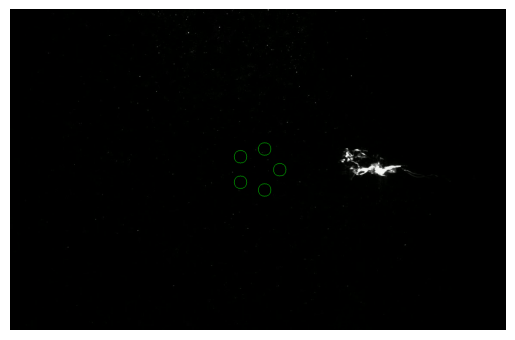

Frame 44


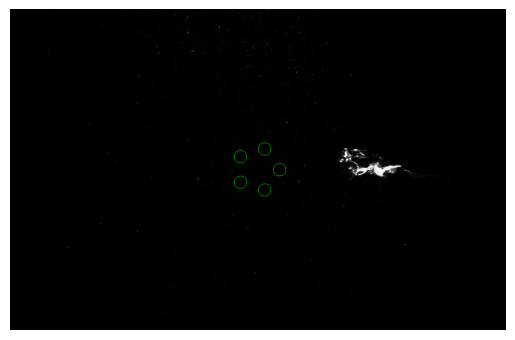

Frame 45


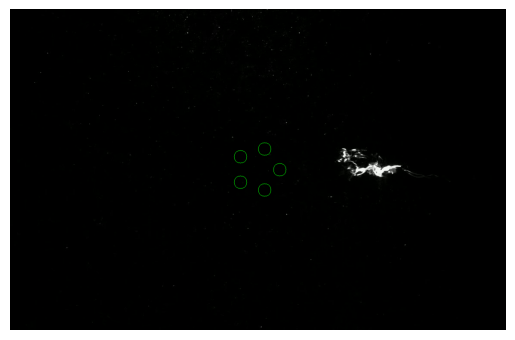

Frame 46


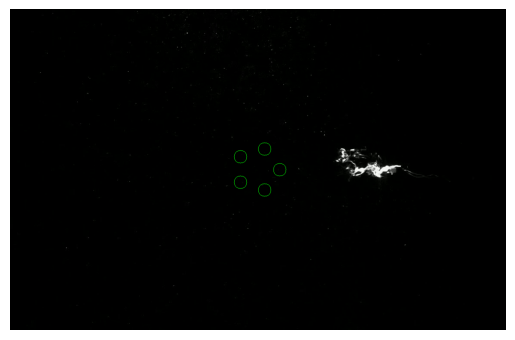

Frame 47


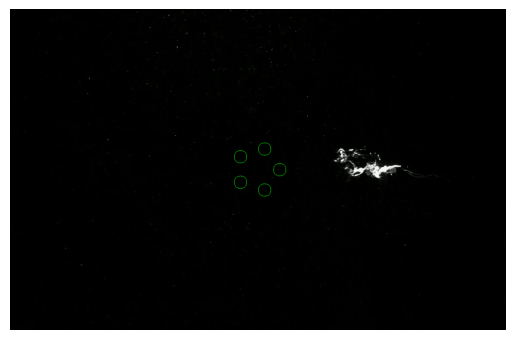

Frame 48


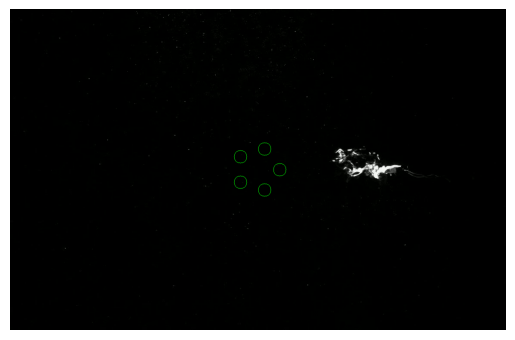

Frame 49


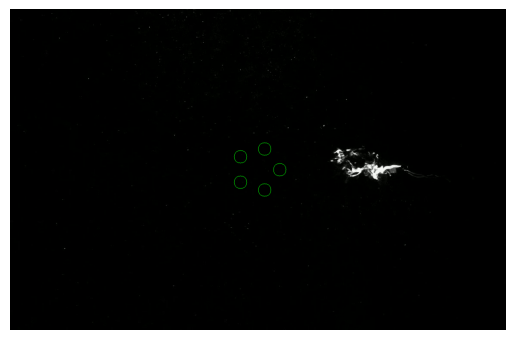

Frame 50


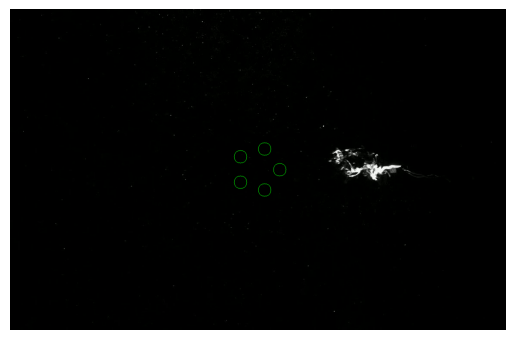

Frame 51


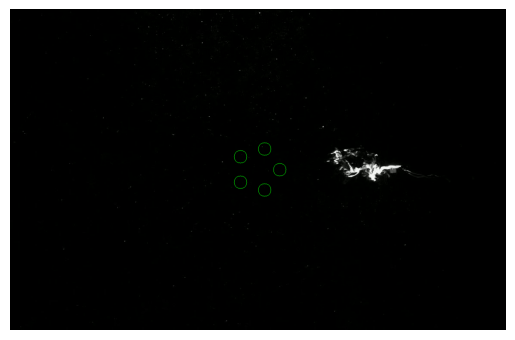

Frame 52


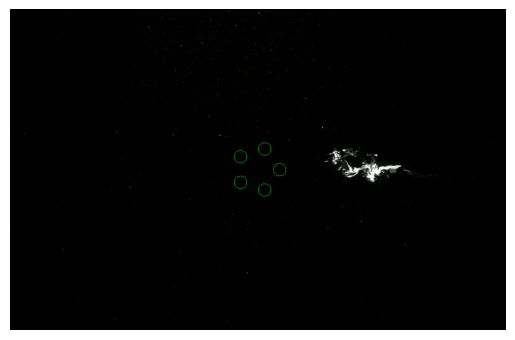

Frame 53


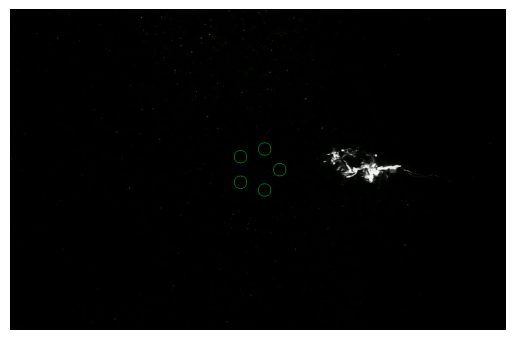

Frame 54


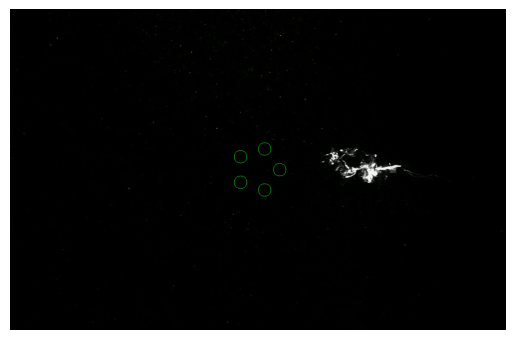

Frame 55


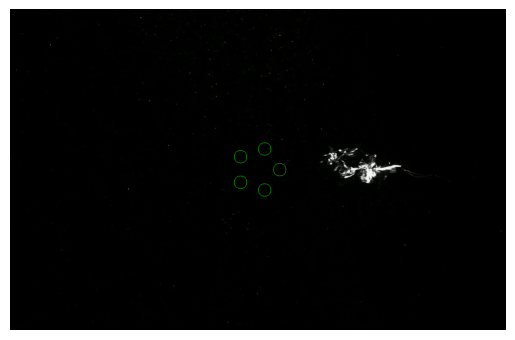

Frame 56


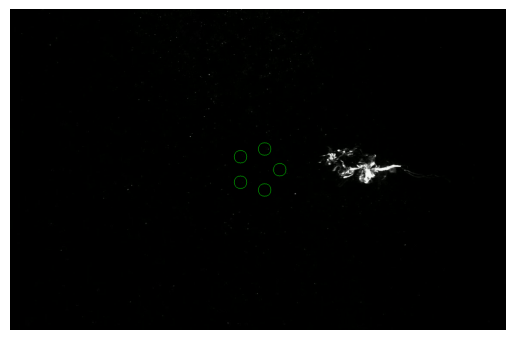

Frame 57


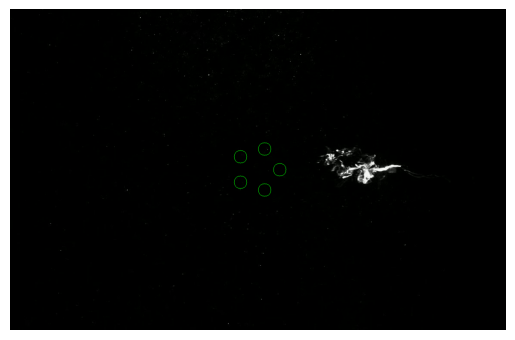

In [ ]:
# Function to calculate average grayscale value in a section
def calculate_section_average(section):
    return np.mean(section)

# Open the video file
video_path = '/content/gdrive/My Drive/bbox_nozzleheight_1in_100ke_30g_10fps_01.mp4'
cap = cv2.VideoCapture(video_path)

# Initialize an empty numpy array to store average grayscale values
average_values = []

# Define the frame number to save as a PNG (e.g., 100)
frame_to_save = 490

# Calculate the center of the frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
center_x = frame_width // 2
center_y = frame_height // 2

# Define the number of circular sections and their properties
num_sections = 5
section_radius = 15  # Adjust this value to control the radius of circular sections
distance_from_center = 50  # Adjust this value to control the distance from the center

# Calculate the angles for placing sections equidistantly around the center
section_angles = np.linspace(0, 2 * np.pi, num_sections, endpoint=False)
counter = 0
# Loop through each frame in the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Create a copy of the frame for visualization
    frame_with_circles = frame.copy()

    # Calculate the average grayscale value for each circular section
    section_average_values = []
    for angle in section_angles:
        x = int(center_x + distance_from_center * np.cos(angle))
        y = int(center_y + distance_from_center * np.sin(angle))

        # Create a circular mask for the section
        mask = np.zeros_like(frame)
        cv2.circle(mask, (x, y), section_radius, (255, 255, 255), thickness=-1)

        # Apply the mask to the frame for visualization
        section = cv2.bitwise_and(frame_with_circles, mask)

        # Draw the circular section on the frame
        cv2.circle(frame_with_circles, (x, y), section_radius, (0, 255, 0), 1)

        # Calculate the average value for the circular section
        section_average = calculate_section_average(section)
        section_average_values.append(section_average)

    # Store the section average values in the numpy array
    average_values.append(section_average_values)

    # Save the frame as a PNG if it's the specified frame number
    if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) == frame_to_save:
        cv2.imwrite('/content/frame_to_save.png', frame_with_circles)
        print(f"Saved frame {frame_to_save} as frame_to_save.png")

    # Display the frame with circular sections
    plt.imshow(cv2.cvtColor(frame_with_circles, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print('Frame ' + str(counter))
    counter = counter +1
    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Convert the list of section average values to a numpy array
average_values = np.array(average_values)

# Print the numpy array containing average grayscale values for each frame and section
print(average_values)

### **Add the category**

In [ ]:
category = np.ones((1800, 1), dtype=int)
array_height = np.append(average_values, category, axis=1)
array_height.shape

### **Save the array**

In [ ]:
np.save('array_height1', array_height)
%cp /content/array_height1.npy /content/gdrive/My\ Drive
%cp /content/frame_to_save.png /content/gdrive/My\ Drive